In [2]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [3]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [4]:
condition_properties = {'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
                                      2:[0,1,4,7,10,13,16,19,22,24]},
                        'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
                                    2:[0,1,4,8,10,13,16,19,22,24]},
                        
                        'Evo2D_Ira1_Mis':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        'Evo2D_Ira1_Non':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        
                        'Evo3D_Ira1_Mis':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        
#                         'Evo3D_TCG':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21]},               
                       }


n_gens = 8
effective_n = 6 * 10**8 

In [175]:
for condition,reps in condition_properties.items():
    this_data = p.read_csv(f'{condition}_counts_curated.csv')

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
        this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]


        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time','Probability_Adaptive']]
        this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

    #     if condition == 'Evo2D_Ira1_non':
    #         break
#         adaptive_only = this_fit_mut[this_fit_mut['Probability_Adaptive']>0.5]
        
#         print(f'{condition}_{rep}',len(adaptive_only))
#         sns.histplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',kde=True)
#         plt.legend()
    print(condition)
    if condition == 'Evo2D_Ira1_Mis':
        break
        
#         fitness_order = np.argsort(this_fit_mut['Fitness'].values)

#         fig,ax = plt.subplots(figsize=(10,4))
#         plt.subplot(1,2,1)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Fitness')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.subplot(1,2,2)

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.tight_layout()
#         plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')



Evo1D_IRAs
Evo1D_TCG
Evo2D_Ira1_Mis


In [176]:
print(condition,rep)

Evo2D_Ira1_Mis 2


In [179]:
home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
# home_dir = os.path.expanduser(home_dir)
rearray_map = p.read_csv(f'{home_dir}/data/BenomylTest/EvolvingFront_rearray_map_with_ploidy.csv')

remeasurement_data = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

bcs_isolated_here = []
for bc,cloneID in zip(remeasurement_data['barcode'].values,remeasurement_data['cloneID_new'].values):
#     print(cloneID)
    if not p.isnull(cloneID):
        if 'rearray' in cloneID:
            source_well = rearray_map[rearray_map['destination_well']==cloneID]['source_well'].values[0]

#             if 'EVO1D_IRAs_R1' in source_well:
                
            if 'EVO2D_IRA1_MIS_R2' in source_well:

                bcs_isolated_here.append(bc)

isolated_here = remeasurement_data[remeasurement_data['barcode'].isin(bcs_isolated_here)]

overlapping_bcs = [bc for bc in this_data['barcode'].values if bc in isolated_here['barcode'].values]

In [180]:
overlapping_bcs

['TGATCAATCTACAAAAATATTTAATG_CTCTTAATAGTGAATATTGTTAACAC',
 'CATTGAATCACAAAATAGGTTAGATG_CTAAAAACCTTAAATTAATTTCAAAT',
 'CATTGAATCACAAAATAGGTTAGATG_TGTTAAACCCATAAATTCGTTTGGCG',
 'CATTGAATCACAAAATAGGTTAGATG_CGGTAAACGGGAAACTTGCTTGGGGC',
 'CATTGAATCACAAAATAGGTTAGATG_AATCTAACTTTGAAGGTTATTAATTT',
 'TGATCAATCTACAAAAATATTTAATG_TGATTAACTAAAAAAGAACTTACATC',
 'TGATCAATCTACAAAAATATTTAATG_GGGCGAAACTGCAAGGCAGTTAGGCG',
 'CATTGAATCACAAAATAGGTTAGATG_AACGAAAGTTCCAACTACTTTTGAAT',
 'TGATCAATCTACAAAAATATTTAATG_GCGAGAAGGGTTAATGAACTTCAGCC',
 'TGATCAATCTACAAAAATATTTAATG_CCGGGAAGAAAGAAACGGATTACTAG',
 'TGATCAATCTACAAAAATATTTAATG_CCTTTAAACCAGAAATCAATTTTCCT',
 'TGATCAATCTACAAAAATATTTAATG_GCCTGAATCTTTAAGCCGTTTAGGGA',
 'CATTGAATCACAAAATAGGTTAGATG_TCATTAAGTTAGAAGCTGATTCTTTG',
 'TGATCAATCTACAAAAATATTTAATG_ATTACAACTCATAAGAATGTTTTGCG',
 'TGATCAATCTACAAAAATATTTAATG_TTAGCAAAACTAAACTTACTTATAAA',
 'CATTGAATCACAAAATAGGTTAGATG_ACGCAAACCACAAATGCCGTTAGAAG',
 'TGATCAATCTACAAAAATATTTAATG_AGTTAAAGCATGAACCGATTTTTCCC',
 'TGATCAATCTAC

Text(0.5, 1.0, 'Evo2D_Ira1_Mis R2')

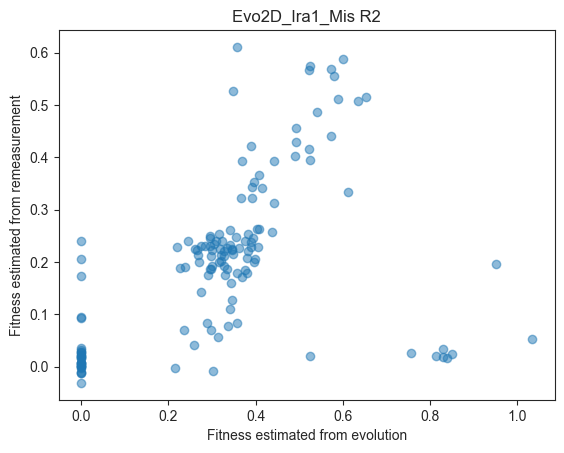

In [184]:

ancestor = 'IRA1_MIS'
fitness = 'Fit2D_both2%5%_fitness'
# fitness = 'Fit2D_early_fitness'


overlap_evo = this_fit_mut[this_fit_mut['barcode'].isin(overlapping_bcs)]
overlap_evo = overlap_evo.sort_values('barcode')

overlap_fit = remeasurement_data[remeasurement_data['barcode'].isin(overlapping_bcs)]
overlap_fit = overlap_fit.sort_values('barcode')

# tools.ancestral_mutations

ancestor_fit = remeasurement_data[remeasurement_data['barcode']==tools.rebarcoding_source_mutants[ancestor]][fitness].values[0]

# ancestor_fit = remeasurement_data[remeasurement_data[]




plt.scatter(8*overlap_evo['Fitness'].values,
            overlap_fit[fitness].values-ancestor_fit,alpha=0.5)

plt.xlabel('Fitness estimated from evolution')
plt.ylabel('Fitness estimated from remeasurement')
plt.title(f'{condition} R{rep}')

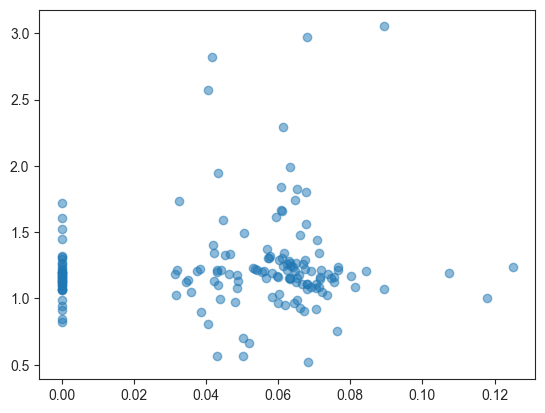

In [119]:
plt.scatter(this_fit_mut[this_fit_mut['barcode'].isin(overlapping_bcs)]['Fitness'].values,
            remeasurement_data[remeasurement_data['barcode'].isin(overlapping_bcs)]['Fit3D_both2%5%_fitness'].values,alpha=0.5)

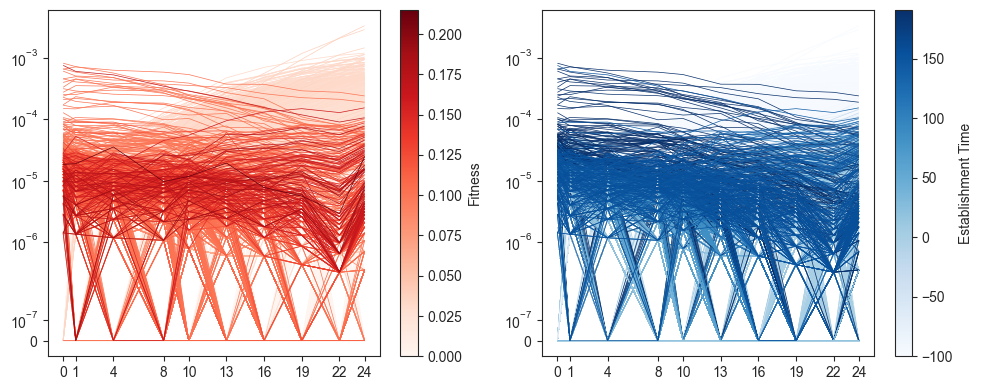

In [102]:
fitness_order = np.argsort(this_fit_mut['Fitness'].values)

fig,ax = plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
these_freqs = these_freqs[fitness_order,:]

lc = multiline(these_ts,these_freqs, 
               this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

axcb = fig.colorbar(lc)
axcb.set_label('Fitness')

plt.yscale('symlog',linthresh=1/(max(np.nansum(this_data[all_samples],axis=0))+10))
plt.xticks(timepoints,timepoints)

plt.subplot(1,2,2)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

lc = multiline(these_ts,these_freqs, 
               this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

axcb = fig.colorbar(lc)
axcb.set_label('Establishment Time')

plt.yscale('symlog',linthresh=1/(max(np.nansum(this_data[all_samples],axis=0))+10))
plt.xticks(timepoints,timepoints)

plt.tight_layout()
plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')

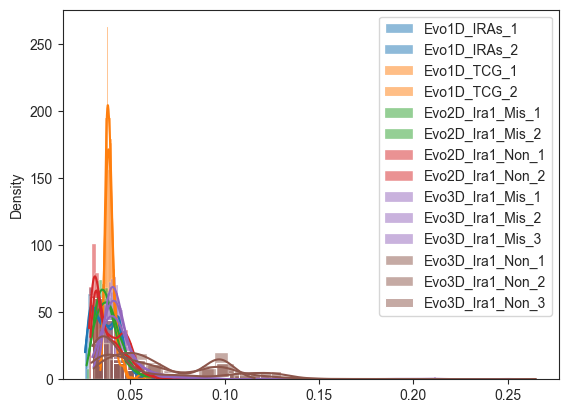

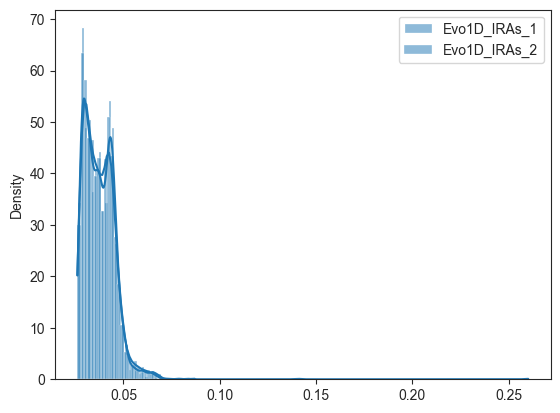

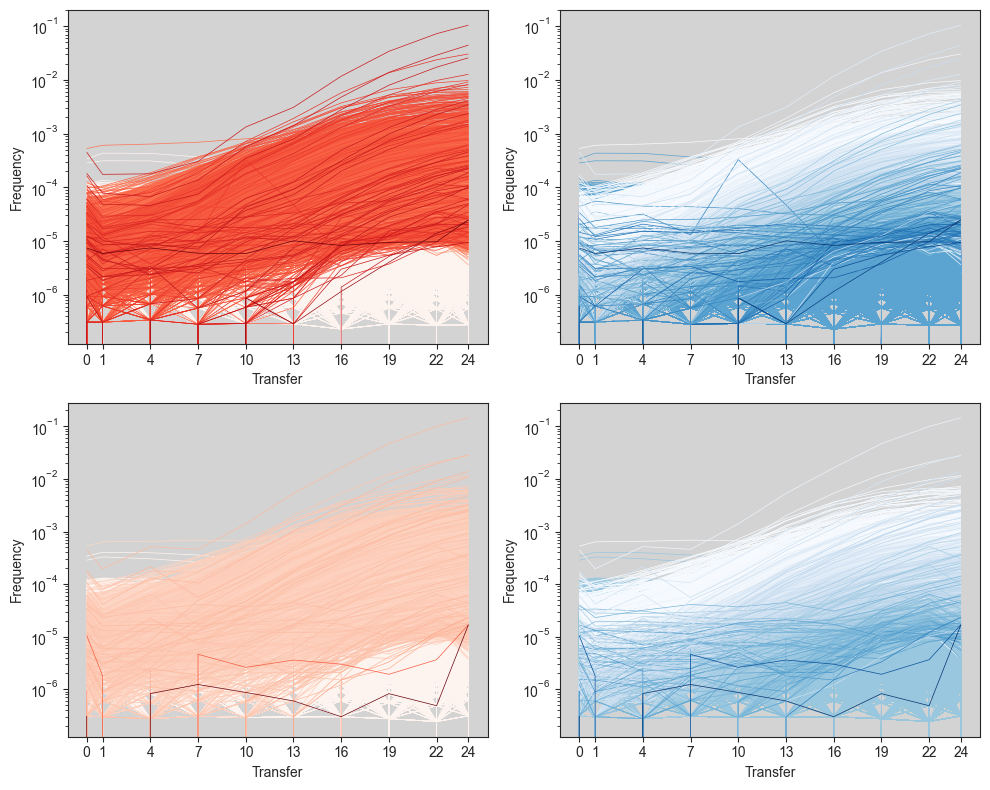

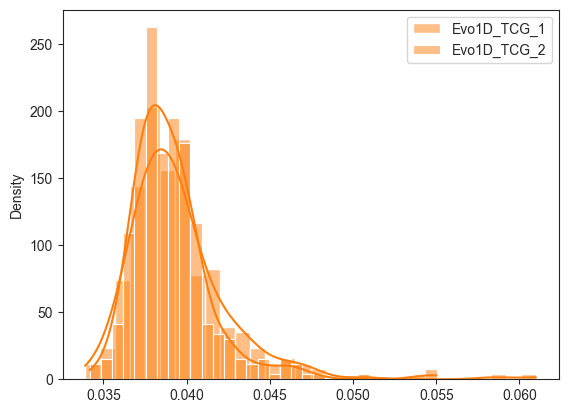

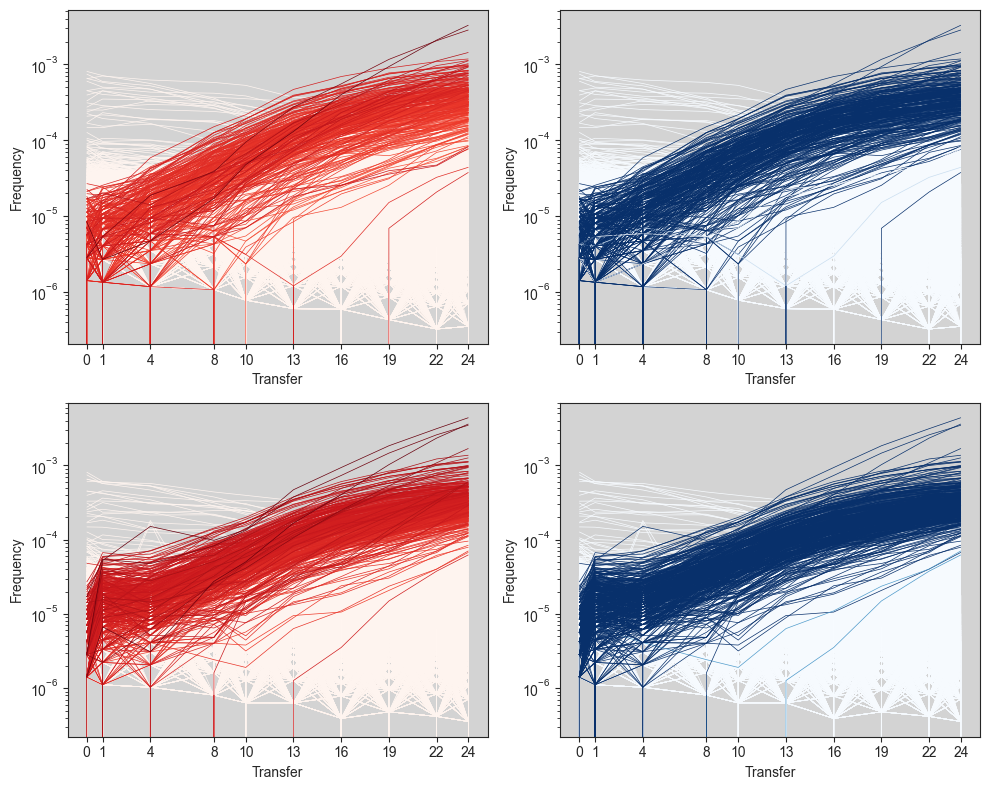

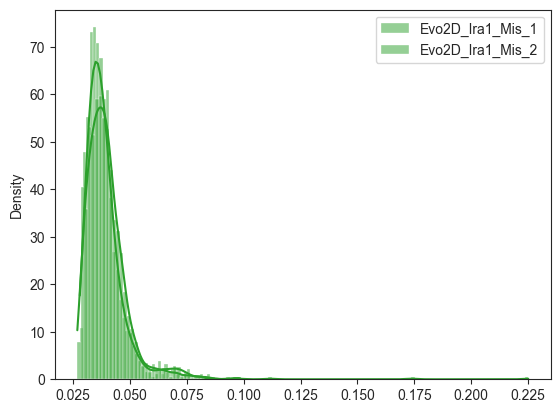

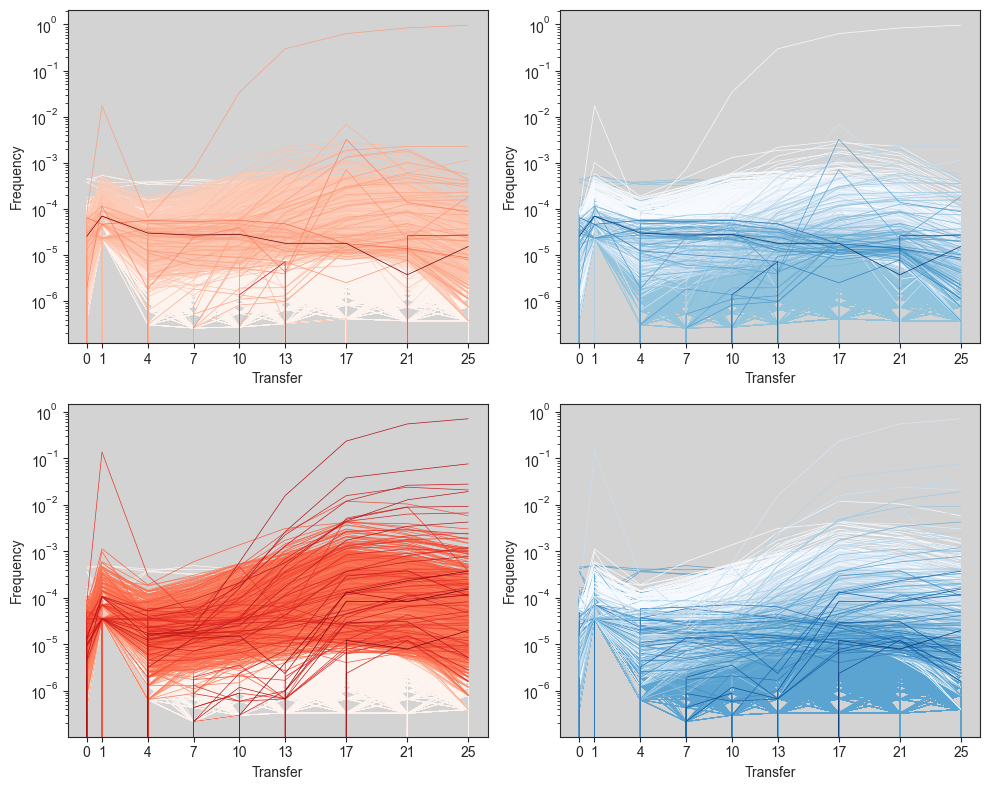

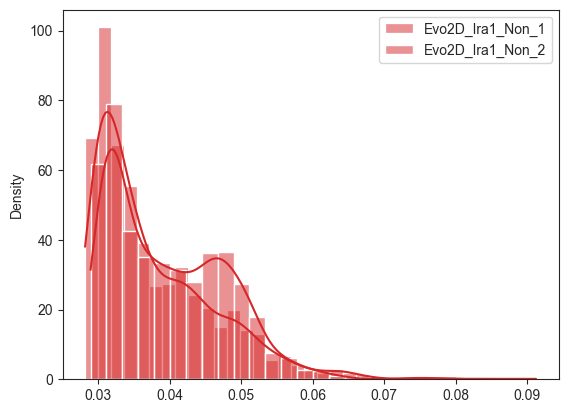

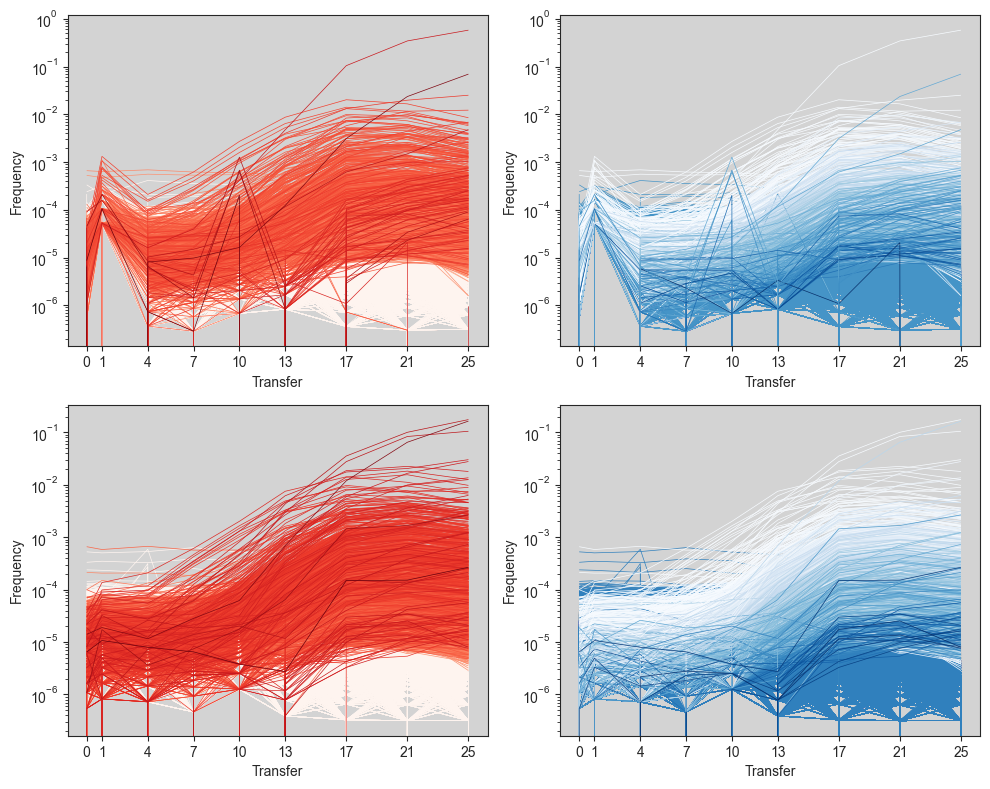

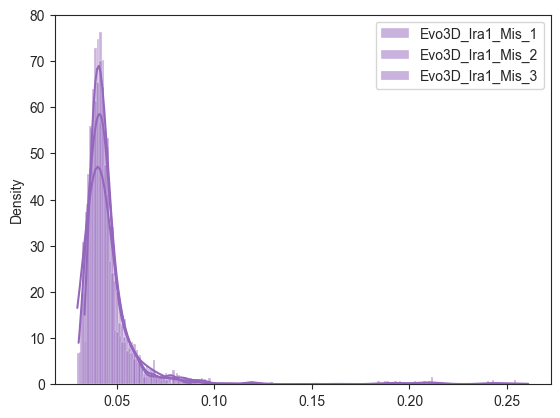

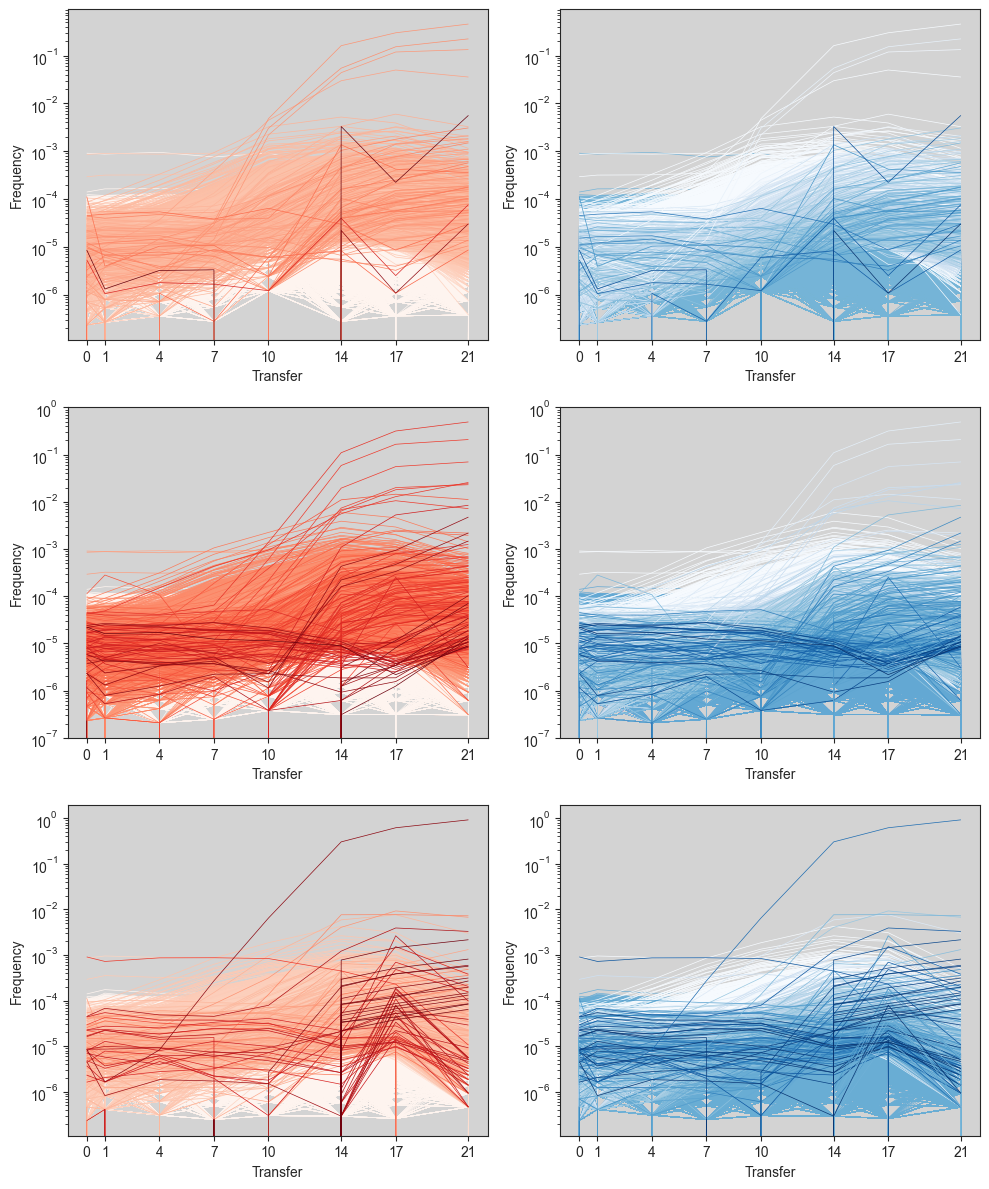

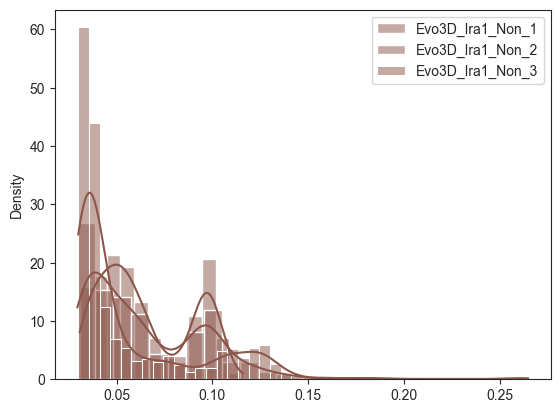

In [ ]:
condition_properties = {
                        'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
                                      2:[0,1,4,7,10,13,16,19,22,24]},
                        'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
                                    2:[0,1,4,8,10,13,16,19,22,24]},
                        
                        'Evo2D_Ira1_Mis':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        'Evo2D_Ira1_Non':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        
                        'Evo3D_Ira1_Mis':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                       }

condition_colors = {key:sns.color_palette()[i] for i,key in enumerate(condition_properties.keys())}


# condition_properties = {'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21],
#                                          3:[0,1,4,7,10,14,17,21]}}

all_dfes,all_dfes_ax = plt.subplots()

for condition,reps in condition_properties.items():
    this_data = p.read_csv(f'{condition}_counts_curated.csv')
    
#     this_trajs = plt.figure(figsize=(4*len(reps.keys())+1,4*2))
#     grids

    this_dfe,this_dfe_ax = plt.subplots()
    
    traj_fig,traj_ax = plt.subplots(figsize=(10,4*len(reps)),nrows=len(reps),ncols=2)

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
        this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]


        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time']]
        this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

    #     if condition == 'Evo2D_Ira1_non':
    #         break
        adaptive_only = this_fit_mut[this_fit_mut['Fitness']>0]

# #         sns.kdeplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',alpha=0.5)
#         plt.gca()

        sns.histplot(adaptive_only['Fitness'].values,stat='density',label=f'{condition}_{rep}',kde=True,ax=all_dfes_ax,
                    color=condition_colors[condition])
    
        sns.histplot(adaptive_only['Fitness'].values,stat='density',label=f'{condition}_{rep}',kde=True,ax=this_dfe_ax,
                    color=condition_colors[condition])
        
        
        fitness_order = np.argsort(this_fit_mut['Fitness'].values)
        
        these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
        these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
        these_freqs = these_freqs[fitness_order,:]
        
#         traj_fit.add_subplot()

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Fitness'].values[fitness_order], ax=traj_ax[rep-1,0],
                       cmap='Reds', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Fitness')

        traj_ax[rep-1,0].set_yscale('log')
        traj_ax[rep-1,0].set_xticks(timepoints,timepoints)
        
        traj_ax[rep-1,0].set_xlabel('Transfer')
        traj_ax[rep-1,0].set_ylabel('Frequency')

#         traj_fit.add_subplot()

        traj_ax[rep-1,0].set_facecolor('lightgrey')

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Establishment_Time'].values[fitness_order], ax=traj_ax[rep-1,1],
                       cmap='Blues', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

        traj_ax[rep-1,1].set_yscale('log')
        traj_ax[rep-1,1].set_xticks(timepoints,timepoints)
        
        traj_ax[rep-1,1].set_xlabel('Transfer')
        traj_ax[rep-1,1].set_ylabel('Frequency')
        
        traj_ax[rep-1,1].set_facecolor('lightgrey')
    
    this_dfe_ax.legend()
    this_dfe.savefig(f'figures/fitmut1/{condition}_dfes.pdf',bbox_inches='tight')
        
    
    traj_fig.tight_layout()
    traj_fig.savefig(f'figures/fitmut1/{condition}_trajectories_fitness_establishment.pdf',bbox_inches='tight')

all_dfes_ax.legend()
all_dfes.savefig(f'figures/fitmut1/all_dfes.pdf',bbox_inches='tight')


In [46]:
s_vals = mean_fitness 
ts_clonal = [used_timepoints[i]-(1/sval) for i,sval in enumerate(s_vals)]
ts_clonal_size = [used_timepoints[i]-(1/sval)*np.log(*sval) for i,sval in enumerate(s_vals)]

In [47]:
ts

[-799.3284079844053,
 -604.6748506287535,
 -431.5644383047075,
 -1.2451230183697106,
 93.45620375375722,
 128.14496126812313]

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_70937/882827573.py:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(adaptives['Establishment_Time'],adaptives['Fitness'],s=np.log(t21_count))


Text(0, 0.5, 'Fitness')

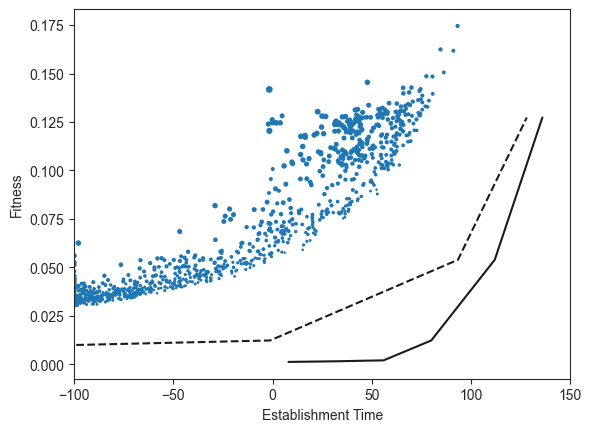

In [51]:
adaptives = this_fit_mut[this_fit_mut['Fitness'] > 0 ]
t21_count = this_data[this_data['barcode'].isin(adaptives['barcode'].values)]['Evo3D_Ira1_Non_3_21_count'].values

plt.scatter(adaptives['Establishment_Time'],adaptives['Fitness'],s=np.log(t21_count))

used_timepoints = [8,32,56,80,112,136,168]

# ts = 

# plt.plot(8*np.asarray(timepoints[2:]),mean_fitness,color='k')
plt.plot(used_timepoints[:-1],mean_fitness,color='k')
plt.plot(ts,mean_fitness,color='k',linestyle='--')

plt.xlim(-100,150)

plt.xlabel('Establishment Time')
plt.ylabel('Fitness')

In [38]:
timepoints

[0, 1, 4, 7, 10, 14, 17, 21]

array([-807.32716933, -636.67327997, -487.56238729,  -81.23281459,
        -18.48986986,   -7.72773191])

In [206]:
for condition,reps in condition_properties.items():
    this_data = p.read_csv(f'{condition}_counts_curated.csv')

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
        this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]


        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time']]
        this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

    #     if condition == 'Evo2D_Ira1_non':
    #         break
#         adaptive_only = this_fit_mut[this_fit_mut['Probability_Adaptive']>0.5]
        
#         print(f'{condition}_{rep}',len(adaptive_only))
#         sns.histplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',kde=True)
#         plt.legend()
    print(condition)
    if condition == 'Evo2D_Ira1_Mis':
        break
        
#         fitness_order = np.argsort(this_fit_mut['Fitness'].values)

#         fig,ax = plt.subplots(figsize=(10,4))
#         plt.subplot(1,2,1)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Fitness')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.subplot(1,2,2)

#         lc = multiline(these_ts,these_freqs, 
#                        this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

#         axcb = fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

#         plt.yscale('log')
#         plt.xticks(timepoints,timepoints)

#         plt.tight_layout()
#         plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')




Evo3D_Ira1_Non


In [25]:
home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
# home_dir = os.path.expanduser(home_dir)
rearray_map = p.read_csv(f'{home_dir}/data/BenomylTest/EvolvingFront_rearray_map_with_ploidy.csv')

remeasurement_data = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

bcs_isolated_here = []
for bc,cloneID in zip(remeasurement_data['barcode'].values,remeasurement_data['cloneID_new'].values):
#     print(cloneID)
    if not p.isnull(cloneID):
        if 'rearray' in cloneID:
            source_well = rearray_map[rearray_map['destination_well']==cloneID]['source_well'].values[0]

#             if 'EVO1D_IRAs_R1' in source_well:
                
            if 'EVO3D_IRA1_NON_R2' in source_well:

                bcs_isolated_here.append(bc)

isolated_here = remeasurement_data[remeasurement_data['barcode'].isin(bcs_isolated_here)]

overlapping_bcs = [bc for bc in this_data['barcode'].values if bc in isolated_here['barcode'].values]

Text(0.5, 1.0, 'Evo3D_Ira1_Non R3')

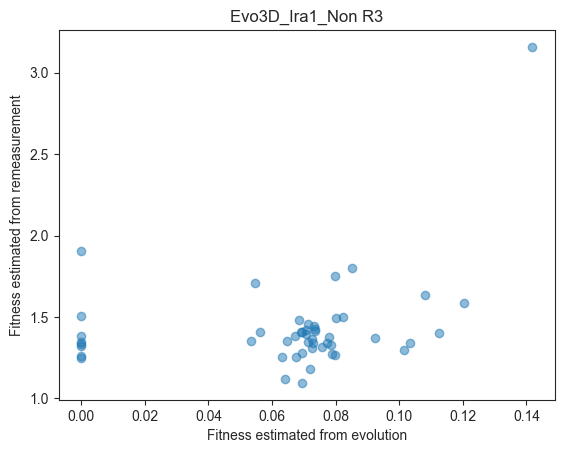

In [27]:

ancestor = 'IRA1_NON'
fitness = 'Fit3D_both2%5%_fitness'
# fitness = 'Fit3D_early_fitness'
# fitness = 'Fit2D_early_fitness'


overlap_evo = this_fit_mut[this_fit_mut['barcode'].isin(overlapping_bcs)]
overlap_evo = overlap_evo.sort_values('barcode')

overlap_fit = remeasurement_data[remeasurement_data['barcode'].isin(overlapping_bcs)]
overlap_fit = overlap_fit.sort_values('barcode')

# tools.ancestral_mutations

ancestor_fit = remeasurement_data[remeasurement_data['barcode']==tools.rebarcoding_source_mutants[ancestor]][fitness].values[0]

# ancestor_fit = remeasurement_data[remeasurement_data[]




plt.scatter(overlap_evo['Fitness'].values,
            overlap_fit[fitness].values-ancestor_fit,alpha=0.5)

plt.xlabel('Fitness estimated from evolution')
plt.ylabel('Fitness estimated from remeasurement')
plt.title(f'{condition} R{rep}')

In [85]:
bc_list = this_fit_mut.sort_values('Fitness',ascending=False)['barcode'].values[:10]

In [86]:
this_data[this_data['barcode'].isin(bc_list)]

high_diversity_BC            low_diversity_BC  \
5431   TATAGAAAATACAAAACCATTAACCC  ATCACAATAACTAAACTGATTCTTCA   
5841   TCCCTAACATTAAAAATTCTTCGGAG  ATCACAATAACTAAACTGATTCTTCA   
6974   TAAATAAACTAGAAAAATCTTTTATA  ATCACAATAACTAAACTGATTCTTCA   
7781   GCAAAAACCTGTAACGCGATTATGAT  ATCACAATAACTAAACTGATTCTTCA   
21567  ACATAAAACCACAATTGAGTTGCGCA  ATCACAATAACTAAACTGATTCTTCA   
22710  TTTAGAAGTATTAACGATTTTTGAAT  ATCACAATAACTAAACTGATTCTTCA   
29974  AAACCAATGTCTAATGATTTTCACGT  ATCACAATAACTAAACTGATTCTTCA   
33754  CACTGAAGCCCTAAAGAAATTGTAGA  ATAACAATAACTAAACTGATTCTTCA   
34362  AACTTAAGATAGAAACAATTTCTATT  ATCACAATAACTAAACTGATTCTTCA   
35896  AGCTAAACCTGGAAATGGGTTTTACG  ATCACAATAACTAAACTGATTCTTCA   

       Evo3D_Ira1_Non_0_0_count  \
5431                        3.0   
5841                        5.0   
6974                        1.0   
7781                        2.0   
21567                       8.0   
22710                       2.0   
29974                       2.0   
33754                       1.0   
34362                       3.0   
35896                       3.0   

                                                fused_bc  \
5431   ATCACAATAACTAAACTGATTCTTCA_TATAGAAAATACAAAACCA...   
5841   ATCACAATAACTAAACTGATTCTTCA_TCCCTAACATTAAAAATTC...   
6974   ATCACAATAACTAAACTGATTCTTCA_TAAATAAACTAGAAAAATC...   
7781   ATCACAATAACTAAACTGATTCTTCA_GCAAAAACCTGTAACGCGA...   
21567  ATCACAATAACTAAACTGATTCTTCA_ACATAAAACCACAATTGAG...   
22710  ATCACAATAACTAAACTGATTCTTCA_TTTAGAAGTATTAACGATT...   
29974  ATCACAATAACTAAACTGATTCTTCA_AAACCAATGTCTAATGATT...   
33754  ATAACAATAACTAAACTGATTCTTCA_CACTGAAGCCCTAAAGAAA...   
34362  ATCACAATAACTAAACTGATTCTTCA_AACTTAAGATAGAAACAAT...   
35896  ATCACAATAACTAAACTGATTCTTCA_AGCTAAACCTGGAAATGGG...   

       Evo3D_Ira1_Non_1_1_count  Evo3D_Ira1_Non_2_1_count  \
5431                        1.0                      18.0   
5841                        6.0                      55.0   
6974                        0.0                       1.0   
7781                        1.0                      13.0   
21567                       3.0                      97.0   
22710                       1.0                       4.0   
29974                       0.0                      17.0   
33754                       0.0                       0.0   
34362                       0.0                       5.0   
35896                       3.0                      26.0   

       Evo3D_Ira1_Non_3_1_count  Evo3D_Ira1_Non_1_4_count  \
5431                       47.0                      99.0   
5841                      244.0                     389.0   
6974                       25.0                      68.0   
7781                       61.0                      62.0   
21567                     210.0                     284.0   
22710                      21.0                      42.0   
29974                      43.0                      55.0   
33754                       0.0                       0.0   
34362                      18.0                      40.0   
35896                      96.0                     133.0   

       Evo3D_Ira1_Non_2_4_count  Evo3D_Ira1_Non_3_4_count  ...  \
5431                       64.0                      53.0  ...   
5841                      277.0                     239.0  ...   
6974                       30.0                      27.0  ...   
7781                       34.0                      55.0  ...   
21567                     230.0                     249.0  ...   
22710                      31.0                      30.0  ...   
29974                      42.0                      49.0  ...   
33754                       0.0                       0.0  ...   
34362                      38.0                      23.0  ...   
35896                      96.0                     101.0  ...   

       Evo3D_Ira1_Non_1_14_count  Evo3D_Ira1_Non_2_14_count  \
5431                       639.0                       54.0   
5841                       170.0                      24